# Unit 5 - Financial Planning

In [103]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import yfinance as yf
from MCForecastTools import MCSimulation

%matplotlib inline

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [ ]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [ ]:
# Function for Fetching Crypto prices from yahoo finance
def closing_price(ticker):
    Asset = pd.DataFrame(yf.download(ticker, start=Start,
      end=End)["Adj Close"])     
    return Asset

In [ ]:
#Code for setting the timeframe to pull crypto prices from Yahoo Finance
from datetime import date, timedelta
Start = date.today() - timedelta(0)
Start.strftime('%Y-%m-%d')

End = date.today() + timedelta(2)
End.strftime('%Y-%m-%d')

'2023-01-04'

In [ ]:
# Combined Dataframe for both cryptocurrencies 
combined_df = closing_price(["BTC-CAD", "ETH-CAD"])

combined_df

[*********************100%***********************]  2 of 2 completed


,BTC-CAD,ETH-CAD
Date,,
2023-01-02,22635.826172,1647.529907
2023-01-03,22612.662109,1646.105347


In [30]:
# Compute current value of my crypto
df_BTC = my_btc * 22612.662109
df_ETH = my_eth * 1646.105347

In [31]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${df_BTC}")
print(f"The current value of your {my_eth} ETH is ${df_ETH}")

The current value of your 1.2 BTC is $27135.1945308
The current value of your 5.3 ETH is $8724.3583391


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [2]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [3]:
# Setting up timeframe and function for pulling stock prices from Yahoo Finance 
import yfinance as yf
from datetime import date, timedelta
import pandas as pd
Start = date.today() - timedelta(7)
Start.strftime('%Y-%m-%d')

End = date.today() + timedelta(2)
End.strftime('%Y-%m-%d')

def closing_price1(ticker):
    Asset = pd.DataFrame(yf.Ticker(ticker, start=Start,
      end=End)['Adj Close'])     
    return Asset

In [4]:
def ticker_data(ticker):
    Asset =  pd.DataFrame(yf.Ticker(ticker).history(start=Start,end=End))
    return Asset

In [5]:
# Defining dataframes for separate stocks
df_SPY = ticker_data("SPY")
df_AGG = ticker_data("AGG")

In [6]:
# Renaming columns for SPY ticker 
df_SPY.rename(columns = {'Open':'open', 'High':'high',
                              'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

In [7]:
# Renaming columns for AGG ticker
df_AGG.rename(columns = {'Open':'open', 'High':'high',
                              'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

In [8]:
# Combined dataframe for SPY and AGG stocks 
df_ticker1 = pd.concat([df_SPY, df_AGG], axis=1, keys=["SPY", "AGG"])

In [9]:
# Displaying combined dataframe
df_ticker1

SPY                                      \
                                 open        high         low       close   
Date                                                                        
2022-12-27 00:00:00-05:00  382.790009  383.149994  379.649994  381.399994   
2022-12-28 00:00:00-05:00  381.329987  383.390015  376.420013  376.660004   
2022-12-29 00:00:00-05:00  379.630005  384.350006  379.079987  383.440002   
2022-12-30 00:00:00-05:00  380.640015  382.579987  378.429993  382.429993   

                                                                  AGG  \
                             volume Dividends Stock Splits       open   
Date                                                                    
2022-12-27 00:00:00-05:00  51638200         0            0  97.459999   
2022-12-28 00:00:00-05:00  70911500         0            0  97.470001   
2022-12-29 00:00:00-05:00  66970900         0            0  97.209999   
2022-12-30 00:00:00-05:00  83975100         0            0  97.250000   

                                                                      \
                                high        low      close    volume   
Date                                                                   
2022-12-27 00:00:00-05:00  97.620003  97.209999  97.260002   7925700   
2022-12-28 00:00:00-05:00  97.500000  97.080002  97.089996  12131200   
2022-12-29 00:00:00-05:00  97.470001  97.180000  97.449997   7763300   
2022-12-30 00:00:00-05:00  97.360001  96.970001  96.989998   8469000   

                                                  
                          Dividends Stock Splits  
Date                                              
2022-12-27 00:00:00-05:00         0            0  
2022-12-28 00:00:00-05:00         0            0  
2022-12-29 00:00:00-05:00         0            0  
2022-12-30 00:00:00-05:00         0            0

In [16]:
# Navigating through dataframe to obtain latest closing price for SPY stock
df_ticker1.sort_values('Date', ascending=False).head(1)[('SPY', 'close')]

Date
2022-12-30 00:00:00-05:00    382.429993
Name: (SPY, close), dtype: float64

In [17]:
# Navigating through dataframe to obatin latest closing price for AGG stock
df_ticker1.sort_values('Date', ascending=False).head(1)[('AGG', 'close')]

Date
2022-12-30 00:00:00-05:00    96.989998
Name: (AGG, close), dtype: float64

In [18]:
# Storing closing prices as variables
spy_close_price = 382.429993
agg_close_price = 96.989998

In [19]:
# Print SPY and AGG close prices
print(f"Current SPY closing price: ${spy_close_price}")
print(f"Current AGG closing price: ${agg_close_price}")

Current SPY closing price: $382.429993
Current AGG closing price: $96.989998


In [13]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value}")

The current value of your 50 SPY shares is $19121.49965
The current value of your 200 AGG shares is $19397.9996


### Savings Health Analysis

In [32]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = [df_BTC + df_ETH]
shares = [my_spy_value + my_agg_value]
fin_data = [crypto, shares]

In [33]:
# Create savings DataFrame
df_savings = pd.DataFrame(fin_data, columns=['amount'])  

# Created a new dataframe name here in order to change the row names
df_savings1 = df_savings.rename(index ={0: 'crypto', 1: 'shares'})

# Display savings DataFrame
df_savings1

,amount
crypto,35859.55287
shares,38519.49925


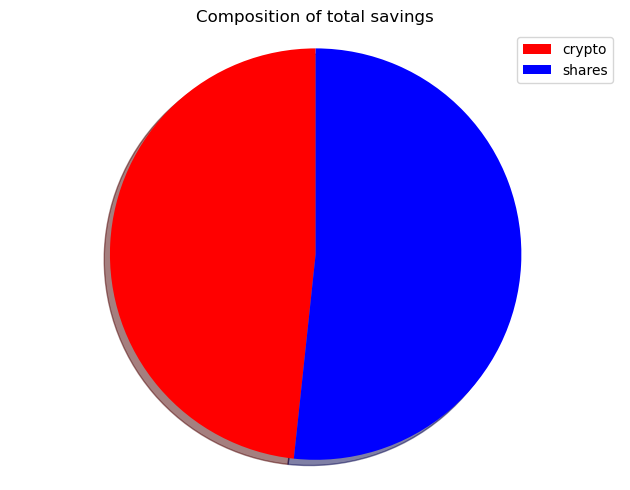

In [35]:
# Plot savings pie chart
import matplotlib.pyplot as plt

labels = ['crypto', 'shares']
sizes = [35996.749976, 38519.499250]
colors = ['red', 'blue']

df_savings1 = plt.pie(sizes, colors=colors, shadow=True, startangle = 90)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title("Composition of total savings")
plt.show()

In [36]:
# Set ideal emergency fund
emergency_fund = 12000 * 3

# Calculate total amount of savings
total_savings = df_BTC + df_ETH + my_spy_value + my_agg_value

In [37]:
# Displaying total savings dataframe
total_savings

74379.05211989999

In [38]:
# Validate saving health
if total_savings >= emergency_fund:
    print(f"Congratulations, you have enough money in your fund.")
else:
    print(f"You are ${emergency_fund - total_savings} away from your goal.")

Congratulations, you have enough money in your fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [189]:
# Defining function to pull 5 years' data, i.e. 365*5 = 1825
Start = date.today() - timedelta(1825)
Start.strftime('%Y-%m-%d')

End = date.today() + timedelta(2)
End.strftime('%Y-%m-%d')

def closing_price2(ticker):
    Asset = pd.DataFrame(yf.Ticker(ticker, start=Start,
      end=End)['Adj Close'])     
    return Asset

In [197]:
# Function for pulling ticker data
def ticker_data1(ticker):
    Asset =  pd.DataFrame(yf.Ticker(ticker).history(start=Start,end=End))
    return Asset

In [194]:
# defining SPY and AGG dataframes
df_SPY1 = ticker_data1("SPY")
df_AGG1 = ticker_data1("AGG")

In [195]:
# Renaming columns in SPY and AGG dataframes 
df_SPY1.rename(columns = {'Open':'open', 'High':'high',
                              'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

df_AGG1.rename(columns = {'Open':'open', 'High':'high',
                              'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

In [196]:
# Combining SPY and AGG dataframes
df_stock_data = pd.concat([df_SPY1, df_AGG1], axis=1, keys=["SPY", "AGG"])

# Displaying combined dataframe
df_stock_data

SPY                                      \
                                 open        high         low       close   
Date                                                                        
2018-01-03 00:00:00-05:00  246.941033  248.483518  246.941033  248.327423   
2018-01-04 00:00:00-05:00  248.997751  249.879151  248.391779  249.374161   
2018-01-05 00:00:00-05:00  250.200476  251.164504  249.686323  251.035980   
2018-01-08 00:00:00-05:00  250.935026  251.660359  250.632054  251.495102   
2018-01-09 00:00:00-05:00  251.935733  252.716152  251.641924  252.064285   
...                               ...         ...         ...         ...   
2022-12-23 00:00:00-05:00  379.649994  383.059998  378.029999  382.910004   
2022-12-27 00:00:00-05:00  382.790009  383.149994  379.649994  381.399994   
2022-12-28 00:00:00-05:00  381.329987  383.390015  376.420013  376.660004   
2022-12-29 00:00:00-05:00  379.630005  384.350006  379.079987  383.440002   
2022-12-30 00:00:00-05:00  380.640015  382.579987  378.429993  382.429993   

                                                                  AGG  \
                             volume Dividends Stock Splits       open   
Date                                                                    
2018-01-03 00:00:00-05:00  90070400       0.0            0  96.982802   
2018-01-04 00:00:00-05:00  80636400       0.0            0  96.778646   
2018-01-05 00:00:00-05:00  83524000       0.0            0  96.894043   
2018-01-08 00:00:00-05:00  57319200       0.0            0  96.858523   
2018-01-09 00:00:00-05:00  57254000       0.0            0  96.681003   
...                             ...       ...          ...        ...   
2022-12-23 00:00:00-05:00  59857300       0.0            0  98.050003   
2022-12-27 00:00:00-05:00  51638200       0.0            0  97.459999   
2022-12-28 00:00:00-05:00  70911500       0.0            0  97.470001   
2022-12-29 00:00:00-05:00  66970900       0.0            0  97.209999   
2022-12-30 00:00:00-05:00  83975100       0.0            0  97.250000   

                                                                      \
                                high        low      close    volume   
Date                                                                   
2018-01-03 00:00:00-05:00  96.982802  96.840764  96.920662   2441700   
2018-01-04 00:00:00-05:00  96.894053  96.734264  96.858543   2945400   
2018-01-05 00:00:00-05:00  96.894043  96.716497  96.796394   4322900   
2018-01-08 00:00:00-05:00  96.858523  96.716485  96.769753   3394500   
2018-01-09 00:00:00-05:00  96.681003  96.485705  96.503456   2301300   
...                              ...        ...        ...       ...   
2022-12-23 00:00:00-05:00  98.110001  97.900002  97.970001   4823400   
2022-12-27 00:00:00-05:00  97.620003  97.209999  97.260002   7925700   
2022-12-28 00:00:00-05:00  97.500000  97.080002  97.089996  12131200   
2022-12-29 00:00:00-05:00  97.470001  97.180000  97.449997   7763300   
2022-12-30 00:00:00-05:00  97.360001  96.970001  96.989998   8469000   

                                                  
                          Dividends Stock Splits  
Date                                              
2018-01-03 00:00:00-05:00       0.0            0  
2018-01-04 00:00:00-05:00       0.0            0  
2018-01-05 00:00:00-05:00       0.0            0  
2018-01-08 00:00:00-05:00       0.0            0  
2018-01-09 00:00:00-05:00       0.0            0  
...                             ...          ...  
2022-12-23 00:00:00-05:00       0.0            0  
2022-12-27 00:00:00-05:00       0.0            0  
2022-12-28 00:00:00-05:00       0.0            0  
2022-12-29 00:00:00-05:00       0.0            0  
2022-12-30 00:00:00-05:00       0.0            0  

[1258 rows x 14 columns]

In [198]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns 
MC_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [201]:
# Printing the simulation input data
MC_stock_data.portfolio_data.head()

SPY                                      \
                                 open        high         low       close   
Date                                                                        
2018-01-03 00:00:00-05:00  246.941033  248.483518  246.941033  248.327423   
2018-01-04 00:00:00-05:00  248.997751  249.879151  248.391779  249.374161   
2018-01-05 00:00:00-05:00  250.200476  251.164504  249.686323  251.035980   
2018-01-08 00:00:00-05:00  250.935026  251.660359  250.632054  251.495102   
2018-01-09 00:00:00-05:00  251.935733  252.716152  251.641924  252.064285   

                                                                         \
                             volume Dividends Stock Splits daily_return   
Date                                                                      
2018-01-03 00:00:00-05:00  90070400       0.0            0          NaN   
2018-01-04 00:00:00-05:00  80636400       0.0            0     0.004215   
2018-01-05 00:00:00-05:00  83524000       0.0            0     0.006664   
2018-01-08 00:00:00-05:00  57319200       0.0            0     0.001829   
2018-01-09 00:00:00-05:00  57254000       0.0            0     0.002263   

                                 AGG                                   \
                                open       high        low      close   
Date                                                                    
2018-01-03 00:00:00-05:00  96.982802  96.982802  96.840764  96.920662   
2018-01-04 00:00:00-05:00  96.778646  96.894053  96.734264  96.858543   
2018-01-05 00:00:00-05:00  96.894043  96.894043  96.716497  96.796394   
2018-01-08 00:00:00-05:00  96.858523  96.858523  96.716485  96.769753   
2018-01-09 00:00:00-05:00  96.681003  96.681003  96.485705  96.503456   

                                                                        
                            volume Dividends Stock Splits daily_return  
Date                                                                    
2018-01-03 00:00:00-05:00  2441700       0.0            0          NaN  
2018-01-04 00:00:00-05:00  2945400       0.0            0    -0.000641  
2018-01-05 00:00:00-05:00  4322900       0.0            0    -0.000642  
2018-01-08 00:00:00-05:00  3394500       0.0            0    -0.000275  
2018-01-09 00:00:00-05:00  2301300       0.0            0    -0.002752

In [202]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\DELL\Desktop\assignment\Module-5-assignment\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999857,1.006767,0.989834,0.999633,0.998644,1.009379,1.009135,1.003293,1.002051,0.990621,...,1.013497,1.003090,1.003667,1.002562,1.000823,1.007156,1.001266,1.010866,1.000314,0.992083
2,0.993235,1.010581,0.985918,1.006509,0.997358,1.002696,1.019580,1.006247,0.986661,0.976671,...,1.023454,1.010463,1.007747,1.010359,0.992105,1.019634,0.985760,1.015452,0.990229,0.987705
3,1.001111,1.011572,0.992145,1.011292,0.999214,0.997884,1.026753,0.998792,0.970155,0.986875,...,1.021660,1.012704,1.003322,1.011091,0.976621,1.013500,0.990697,1.009754,1.003728,0.988637
4,1.010247,1.012492,0.988363,1.006532,1.000805,0.982738,1.026318,1.004341,0.982525,0.986189,...,1.023990,1.001174,1.010595,1.040375,0.974631,1.007812,0.985732,1.010232,1.003253,0.990738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.190260,4.516562,3.863440,6.377967,9.765739,8.448922,12.107301,8.049545,9.371395,2.295249,...,2.014284,3.920368,3.623951,8.587338,2.540359,7.713489,8.151263,10.164072,6.016269,4.347869
7557,2.171879,4.437635,3.894422,6.453226,9.784101,8.419318,11.909116,8.056387,9.456816,2.293721,...,2.007560,3.938828,3.611263,8.627998,2.576072,7.730527,8.119215,10.069371,5.981954,4.337598
7558,2.157374,4.353471,3.931442,6.455753,9.718398,8.479788,11.960902,8.064484,9.415906,2.291840,...,2.022200,3.928773,3.599113,8.607787,2.542014,7.725575,8.127196,10.133604,6.013466,4.338612
7559,2.164768,4.316042,3.961036,6.347462,9.708773,8.543686,11.911664,8.091647,9.412493,2.332131,...,2.029765,3.966554,3.536200,8.563425,2.584494,7.768577,8.075507,10.198304,5.963081,4.381799


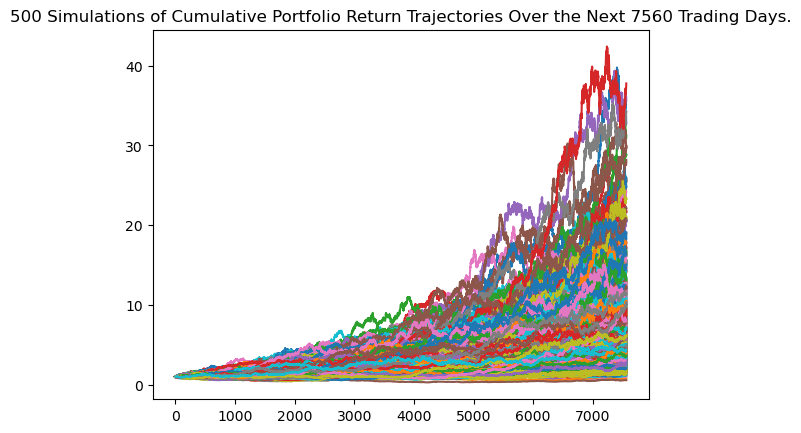

In [203]:
# Plot simulation outcomes
line_plot = MC_stock_data.plot_simulation()

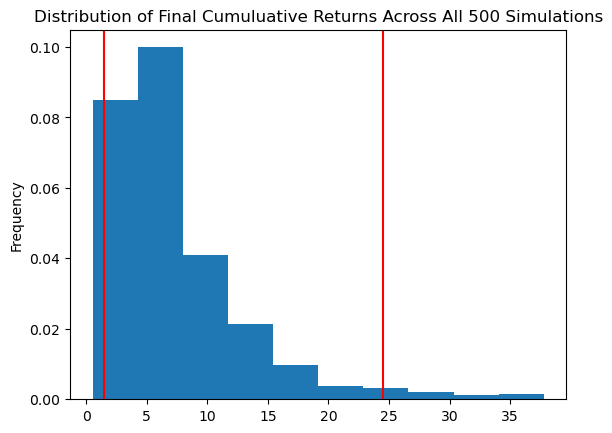

In [205]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stock_data.plot_distribution()

### Retirement Analysis

In [206]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_stock_data.summarize_cumulative_return()


# Print summary statistics
print(summary_stats)

count           500.000000
mean              7.392695
std               5.717408
min               0.542211
25%               3.772139
50%               5.925218
75%               9.076064
max              37.781417
95% CI Lower      1.475832
95% CI Upper     24.495492
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [207]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $29516.65 and $489909.85


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [208]:
# Set initial investment
initial_investment1 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower1 = round(summary_stats[8]*initial_investment1,2)
ci_upper1 = round(summary_stats[9]*initial_investment1,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower1} and ${ci_upper1}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $44274.97 and $734864.77


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [211]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stock_data1 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_stock_data1.portfolio_data.head()

SPY                                      \
                                 open        high         low       close   
Date                                                                        
2018-01-03 00:00:00-05:00  246.941033  248.483518  246.941033  248.327423   
2018-01-04 00:00:00-05:00  248.997751  249.879151  248.391779  249.374161   
2018-01-05 00:00:00-05:00  250.200476  251.164504  249.686323  251.035980   
2018-01-08 00:00:00-05:00  250.935026  251.660359  250.632054  251.495102   
2018-01-09 00:00:00-05:00  251.935733  252.716152  251.641924  252.064285   

                                                                         \
                             volume Dividends Stock Splits daily_return   
Date                                                                      
2018-01-03 00:00:00-05:00  90070400       0.0            0          NaN   
2018-01-04 00:00:00-05:00  80636400       0.0            0     0.004215   
2018-01-05 00:00:00-05:00  83524000       0.0            0     0.006664   
2018-01-08 00:00:00-05:00  57319200       0.0            0     0.001829   
2018-01-09 00:00:00-05:00  57254000       0.0            0     0.002263   

                                 AGG                                   \
                                open       high        low      close   
Date                                                                    
2018-01-03 00:00:00-05:00  96.982802  96.982802  96.840764  96.920662   
2018-01-04 00:00:00-05:00  96.778646  96.894053  96.734264  96.858543   
2018-01-05 00:00:00-05:00  96.894043  96.894043  96.716497  96.796394   
2018-01-08 00:00:00-05:00  96.858523  96.858523  96.716485  96.769753   
2018-01-09 00:00:00-05:00  96.681003  96.681003  96.485705  96.503456   

                                                                        
                            volume Dividends Stock Splits daily_return  
Date                                                                    
2018-01-03 00:00:00-05:00  2441700       0.0            0          NaN  
2018-01-04 00:00:00-05:00  2945400       0.0            0    -0.000641  
2018-01-05 00:00:00-05:00  4322900       0.0            0    -0.000642  
2018-01-08 00:00:00-05:00  3394500       0.0            0    -0.000275  
2018-01-09 00:00:00-05:00  2301300       0.0            0    -0.002752

In [212]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stock_data1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\DELL\Desktop\assignment\Module-5-assignment\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005370,0.985313,1.009243,1.003602,0.993805,0.991747,0.987999,0.980656,0.997605,1.011173,...,1.007921,1.005681,0.993492,0.993973,1.002501,0.983628,1.011490,0.991304,0.995843,1.010725
2,1.025391,1.001853,1.021415,0.989830,1.007122,0.984696,0.984973,0.979458,0.982805,1.023645,...,1.013323,0.991992,1.004882,0.982531,1.004220,0.979873,1.031236,0.987199,1.011559,1.006799
3,1.034630,0.981649,1.012953,1.015981,1.008081,0.988769,0.979678,0.985060,0.995369,1.010890,...,1.005270,1.006227,0.997899,0.979346,1.011658,0.985158,1.029537,0.983579,1.029929,0.988235
4,1.027825,0.990467,1.010885,1.023745,1.015692,0.997612,0.988894,1.005110,0.997310,1.015816,...,0.989457,0.988939,0.976267,0.977059,1.012134,0.979624,1.046445,0.971012,1.031422,0.988481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.047370,2.078093,1.605783,3.790166,2.061556,1.738107,1.630884,0.617274,1.414276,2.370572,...,3.221723,1.328412,1.759903,2.968408,0.863842,0.864010,1.593110,1.198492,1.016701,2.371076
1257,2.043489,2.116779,1.605178,3.764553,2.065085,1.718367,1.627664,0.611006,1.434055,2.315165,...,3.259672,1.336879,1.754424,2.972868,0.860986,0.855346,1.576826,1.171420,1.006916,2.340542
1258,2.030040,2.129781,1.596312,3.732911,2.088690,1.712967,1.639812,0.604706,1.415519,2.326912,...,3.255936,1.332679,1.757930,2.971925,0.864399,0.850632,1.596594,1.172175,0.995153,2.372726
1259,2.057823,2.104745,1.586041,3.722276,2.117056,1.719247,1.624283,0.611762,1.409893,2.313165,...,3.252237,1.330360,1.737676,2.955996,0.870708,0.869583,1.588481,1.154854,0.997596,2.390267


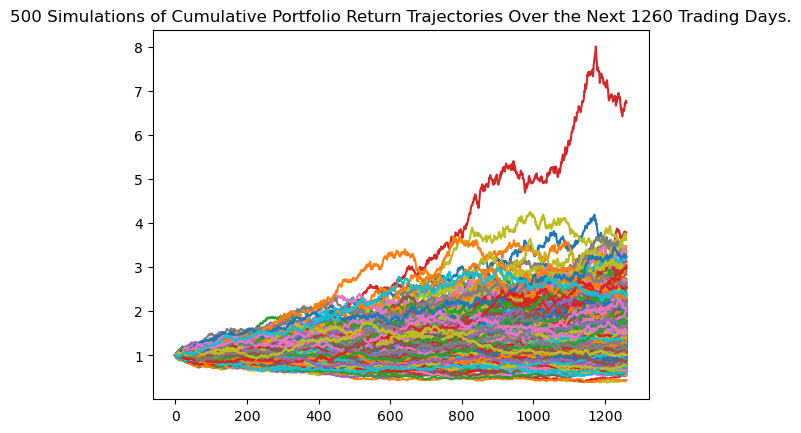

In [213]:
# Plot simulation outcomes
line_plot1 = MC_stock_data1.plot_simulation()

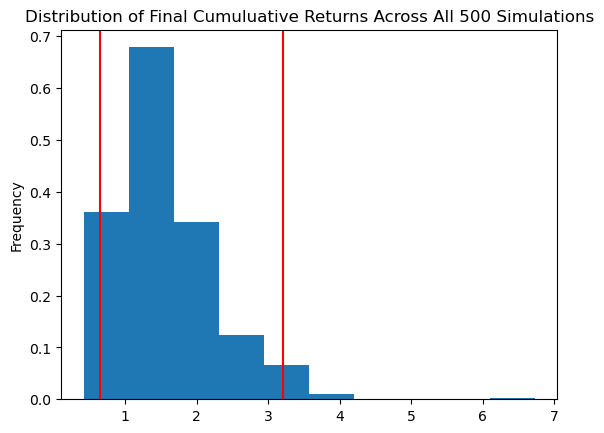

In [214]:
# Plot probability distribution and confidence intervals
dist_plot1 = MC_stock_data1.plot_distribution()

In [218]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats1 = MC_stock_data1.summarize_cumulative_return()

# Print summary statistics
print(summary_stats1)

count           500.000000
mean              1.565572
std               0.681484
min               0.425630
25%               1.092257
50%               1.430762
75%               1.912896
max               6.731880
95% CI Lower      0.643176
95% CI Upper      3.209827
Name: 1260, dtype: float64


In [229]:
# Set initial investment
initial_investment_5 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_stats1[8]*initial_investment_5,2)
ci_upper_five = round(summary_stats1[9]*initial_investment_5,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $38590.58 and $192589.6


### Ten Years Retirement Option

In [222]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_data2 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_stock_data2.portfolio_data.head()

SPY                                      \
                                 open        high         low       close   
Date                                                                        
2018-01-03 00:00:00-05:00  246.941033  248.483518  246.941033  248.327423   
2018-01-04 00:00:00-05:00  248.997751  249.879151  248.391779  249.374161   
2018-01-05 00:00:00-05:00  250.200476  251.164504  249.686323  251.035980   
2018-01-08 00:00:00-05:00  250.935026  251.660359  250.632054  251.495102   
2018-01-09 00:00:00-05:00  251.935733  252.716152  251.641924  252.064285   

                                                                         \
                             volume Dividends Stock Splits daily_return   
Date                                                                      
2018-01-03 00:00:00-05:00  90070400       0.0            0          NaN   
2018-01-04 00:00:00-05:00  80636400       0.0            0     0.004215   
2018-01-05 00:00:00-05:00  83524000       0.0            0     0.006664   
2018-01-08 00:00:00-05:00  57319200       0.0            0     0.001829   
2018-01-09 00:00:00-05:00  57254000       0.0            0     0.002263   

                                 AGG                                   \
                                open       high        low      close   
Date                                                                    
2018-01-03 00:00:00-05:00  96.982802  96.982802  96.840764  96.920662   
2018-01-04 00:00:00-05:00  96.778646  96.894053  96.734264  96.858543   
2018-01-05 00:00:00-05:00  96.894043  96.894043  96.716497  96.796394   
2018-01-08 00:00:00-05:00  96.858523  96.858523  96.716485  96.769753   
2018-01-09 00:00:00-05:00  96.681003  96.681003  96.485705  96.503456   

                                                                        
                            volume Dividends Stock Splits daily_return  
Date                                                                    
2018-01-03 00:00:00-05:00  2441700       0.0            0          NaN  
2018-01-04 00:00:00-05:00  2945400       0.0            0    -0.000641  
2018-01-05 00:00:00-05:00  4322900       0.0            0    -0.000642  
2018-01-08 00:00:00-05:00  3394500       0.0            0    -0.000275  
2018-01-09 00:00:00-05:00  2301300       0.0            0    -0.002752

In [223]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_data2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\DELL\Desktop\assignment\Module-5-assignment\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007769,0.979442,0.986925,1.003885,1.010550,0.997738,1.012882,0.991922,1.008149,0.987517,...,1.012173,1.009343,1.014737,0.977819,1.011257,1.009610,1.002614,0.985608,1.008895,1.002245
2,1.018572,0.970437,0.970416,0.990694,1.002485,1.001456,1.020444,0.993133,1.020178,0.996222,...,1.011730,1.011983,1.006095,0.980007,1.002434,1.010004,1.007060,0.973895,1.019548,1.011566
3,1.033352,0.977051,0.972802,0.985562,0.992580,0.989808,1.039227,0.991864,1.026873,0.982931,...,1.023537,1.001470,1.004086,0.977880,1.012957,1.008414,0.994212,0.990152,1.013469,1.030909
4,1.043425,0.969904,0.975588,0.971104,0.998507,0.989766,1.029709,0.982722,1.035452,0.979252,...,1.039060,1.019738,1.025359,0.983438,1.003444,0.993038,0.990590,0.983022,1.035976,1.048865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.220536,1.902655,1.252254,1.828802,3.036886,2.055484,5.577217,1.017956,2.576250,2.011505,...,5.525000,2.338342,2.406162,3.091055,2.838395,1.308473,3.883325,2.714054,0.820573,3.879700
2517,1.234857,1.902295,1.261249,1.817545,3.030151,2.035724,5.580373,1.003510,2.543199,2.033752,...,5.440361,2.342126,2.429606,3.102705,2.797530,1.301717,3.894022,2.679601,0.828911,3.831023
2518,1.232517,1.906742,1.266047,1.839190,3.054095,2.020630,5.589627,0.990078,2.542929,2.022884,...,5.388264,2.346804,2.437894,3.090691,2.845336,1.310651,3.865791,2.654774,0.822052,3.823204
2519,1.235512,1.889878,1.260504,1.897677,3.054670,2.032561,5.568319,0.985205,2.570201,1.966392,...,5.390055,2.335603,2.453599,3.082336,2.843201,1.309959,3.811731,2.604383,0.803468,3.778859


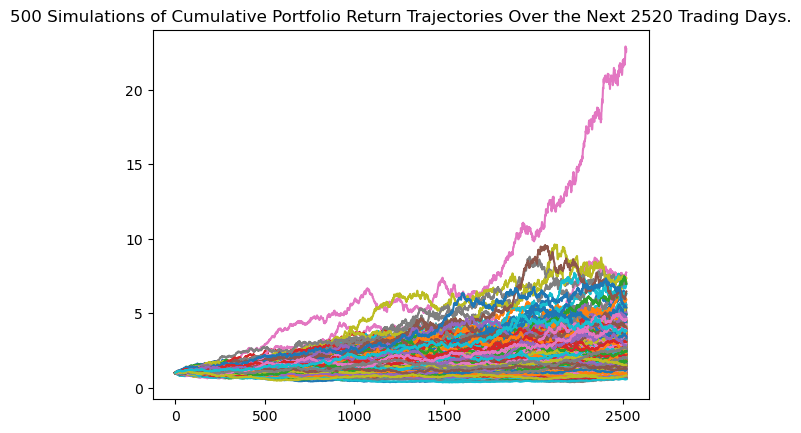

In [224]:
# Plot simulation outcomes
line_plot2 = MC_stock_data2.plot_simulation()

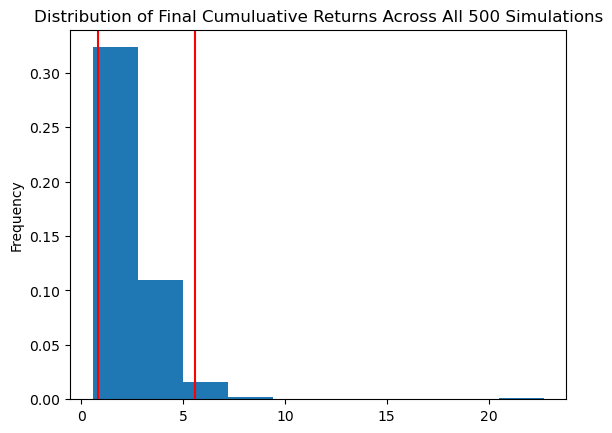

In [225]:
# Plot probability distribution and confidence intervals
dist_plot2 = MC_stock_data2.plot_distribution()

In [226]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats2 = MC_stock_data2.summarize_cumulative_return()

# Print summary statistics
print(summary_stats2)

count           500.000000
mean              2.412159
std               1.556628
min               0.563445
25%               1.465177
50%               2.073603
75%               3.003717
max              22.709668
95% CI Lower      0.801275
95% CI Upper      5.571155
Name: 2520, dtype: float64


In [230]:
# Set initial investment
initial_investment_10 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_stats2[8]*initial_investment_10,2)
ci_upper_ten = round(summary_stats2[9]*initial_investment_10,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $48076.49 and $334269.32


In [39]:
# Additional Comments:

# Based on results obtained from new Monte Carlo Simulation, and the newer weightage 80% stocks and 20% bonds, over a period of 10 years the lower range is $48076.49, and the upper range is $334269.32 with a 95% confidence interval.

# It is not recommended for union members to retire after 10 years, despite a higher portion of stocks, it should be noted that the 10 year return range is significantly lower than the 30 year timeline with a relatively less risky portfolio. 